# GUI Examples

## Necessary Imports

In [1]:
import pychaoson.pychaoson as pychaoson
import pychaoson.calculate_chaos as calc_chaos
import pychaoson.roli_control as roli_control
import pychaoson.gui.control_gui as control_gui
import pychaoson.gui.param_space_gui as param_space_gui

## Prerequisites
Please make sure that:
- a valid supercolider installation is installed on the system
- no sc server is running somewhere
- the sound is routed correctly
-  samplerates match

In [2]:
'Availabe midi port names: {portnames}'.format(portnames = str(roli_control.get_midi_input_list()))

"Availabe midi port names: ['Seaboard Block ITCO Bluetooth']"

In [3]:
input_device = 'default' # change to your needs
output_device = 'default'# change to your needs
midi_port_name = 'Seaboard Block ITCO Bluetooth' # change to your needs
data_path = '../data' # If set to non the location is where there are set in the repository
samples_path = '../samples' # If set to non the location is where there are set in the repository

pychaos = pychaoson.startup(input_device, output_device, data_path, samples_path)
pychaos.start_synth("Fb Sine Map", "Granular", "LinearSin")
pychaos.init_roli_control(midi_port_name)

<IPython.core.display.Javascript object>

Starting sclang process... [sclang | start reading ]
Done.
Registering OSC /return callback in sclang... Done.
Loading default sc3nb SynthDefs... Done.
Booting SuperCollider Server... [scsynth | start reading ]
Done.
Connected...


It is important to set the matplotlib backend to ipympl.

In [5]:
%matplotlib widget

## The Control GUI
The control gui wraps the api call and makes the system controlable from one notebook cell. The gui covers the 5 core features that can be displayed one by one or together

### Full control
- It is possible to display all controls together as one widget
- **Advantage:** Reloads all part when a new patch is loaded or new synth setting selected

In [6]:
control_gui.full_control(pychaos)

Output()

### Every control explained one by one

### Patch control
Patches can save the current state of the synth and reload it later. The state is stored in a json file with a specific name that can be entered in a input box. If a name already exists it can not be used.
- Save a patch:
Verify that this is the state you want to save. \
This includes: Chaotic Map, Synthesis Type, Sample, Roli Mappings, Parameters and Points Of Interest
- Load a patch:
Select a patch from the Select Box and press the button "Load patch". \
The gui will reload with the new settings.
- Delete a patch:
Select a patch from the Select Box and press the button "Delete patch".\
The patch file will be deleted from your system and the patch will no longer be displayed in the gui

In [7]:
display(control_gui.control_patches(pychaos))

### Synth control
The synth control displays the current state of the synth. This includes:
- chaotic system
- Synthesis method
- Sample

It also allows from updating those values by selecting your wished configuration in the select boxes and press the 'Update' button. \
The sample button plays the current sample (Only available when a sample is selected)

In [9]:
display(control_gui.control_synth(pychaos))

### Mapping control
- Variable can be mapped to the roli control axes. 
- The variable are then altered when the roli sends the control messages via midi.

Notice: This can only be used if a roli is connected to the system. 

In [12]:
display(control_gui.control_mappings(pychaos))

### Slider control
- The values of the synth parameters contolable with sliders
- Also allows for changing roli mapping parameters:
    - The sensitivity with which the roli is moving the slider
    - The reversing of the slider

In [13]:
display(control_gui.control_sliders(pychaos))

Accordion(children=(VBox(children=(FloatSlider(value=0.08, continuous_update=False, description='Grain Length:…

### Point of Interest control
It is possible to:
- Add and remove points
- Changing the point of interest internal parameters when selecting one

In [15]:
display(control_gui.control_poi(pychaos))

## The Interactive Parameter Space GUI
#### Left heatmap plot
- Displays the computed dimension space as a heatmap (1D or 2D)
- Displays points:
    - Synth start values
    - Current playing values
    - Point of Interests
- The start point can be selected by pressing on the heatmap plot
- The Reprocess button can be used if a point of interest was removed or added.
- Updates automatically if the chaotic map changed
#### Right line plots
- Upper line plot: Displays the first output values of the chaotic system
- Lower line plot: Displays a loop in the output values of the chaotic system. Displays nothing when no loop was found

These two plots are displaying the output at the selected start parameters. When the synth plays, displays the current played parameters of the first played note

#### Arguments when InteractiveParamspaceAnalysis is called
- The dimension calculation method. Currently working: box_count_dimension_analysis and sample_entropy_analysis
- Points Per Dim: The number of evenly spaced parameters to consider for calculation. **Warning:** Scales fast with more than one dimension e.g. for 2D with 500 points per dim: 500x500 parameter combinations

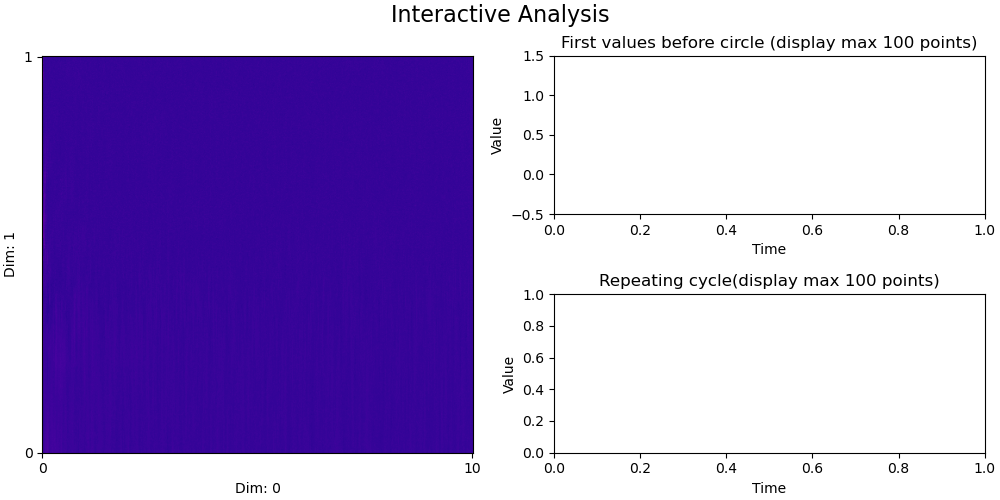

IntText(value=500, description='Points per dim:')

Output()

Button(description='Reprocess Image', style=ButtonStyle(), tooltip='Click me')

Output()

In [16]:
points_per_dim = 500 # change as needed
analysis_function = calc_chaos.box_count_dimension_analysis
param_space_gui.InteractiveParamspaceAnalysis(pychaos, calc_chaos.box_count_dimension_analysis, points_per_dim=points_per_dim)